In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from inference_set_design.config import Config
from inference_set_design.env import ActiveLearningEnvironment

# Running Inference Set Desing on QM9 dataset 
In this tutorial we will demonstrate how to run and evaluate the inference set design pipeline on the QM9 dataset. We benchmark the performance of the **Random**, **Least Confidence** (LC), and **BALD** agents. It may take a few minutes to run these experiments ⏳

In [2]:
for agent in ["random", "active", "bald"]:
    # Create a config 
    cfg = Config.empty()
    cfg.overwrite_run = False
    cfg.agent_name = agent
    cfg.task_name = "qm9" 
    cfg.acquisition_batch_size = 250
    cfg.model_cfg.train_epochs = 25  
    cfg.model_cfg.model_name = "ResMLP"
    cfg.agent_cfg.acq_weights = (1.0, 0.0)
    cfg.agent_cfg.log_explorable_preds = False
    cfg.agent_cfg.save_model = False
    cfg.task_cfg.qm9.emb_name = "ecfp4"
    cfg.task_cfg.qm9.n_explorable_cmpds = 10_000 # Use None to run on the full QM9 dataset
    cfg.task_cfg.qm9.n_init_train_cmpds = 0
    cfg.task_cfg.qm9.data_path = "../../data/QM9"
    cfg.task_cfg.qm9.label_name = "gap_binary"
    cfg.log_path = f"./runs/QM9_{cfg.agent_name}"
    env = ActiveLearningEnvironment(cfg)
    # Run active learning loop
    env.run_active_learning_loop()

29/01/2025 15:22:17 - INFO - logger - Config:
----------
hostname: Ihors-MacBook-Pro.local
device: cpu
git_hash: e2fffbc
agent_name: random
agent_cfg:
  acquisition_strategy: greedy
  acq_criteria:
  - uncertainty
  - random
  acq_weights:
  - 1.0
  - 0.0
  log_explorable_preds: false
  save_model: false
  full_inner_loop_monitoring: false
  mc_iterations: 5
task_name: qm9
task_cfg:
  rxrx3: null
  qm9:
    n_explorable_cmpds: 10000
    n_init_train_cmpds: 0
    emb_name: ecfp4
    label_name: gap_binary
    data_path: ../../data/QM9
  mol3d: null
  corrupted_mnist: null
model_cfg:
  model_name: ResMLP
  lr: 0.001
  l2_reg: 0.0
  grad_clip_norm: 1.0
  dropout: 0.1
  num_ensmbl_members: null
  train_epochs: 25
  train_batch_size: 1024
  early_stop_patience: 50
  n_hidden_layers: 2
  hidden_size: 512
  skip_connections: false
  trunk_hidden_size: 512
  n_trunk_res_block: 2
  task_hidden_size: 512
  n_task_layers: 2
seed: 42
desc: default configuration
log_path: ./runs/QM9_random
overwrit

# Plot results

In [3]:
with open("./runs/QM9_active/metrics.json", "r") as file:
    metrics_active = json.load(file)
with open("./runs/QM9_bald/metrics.json", "r") as file:
    metrics_bald = json.load(file)
with open("./runs/QM9_random/metrics.json", "r") as file:
    metrics_random = json.load(file)

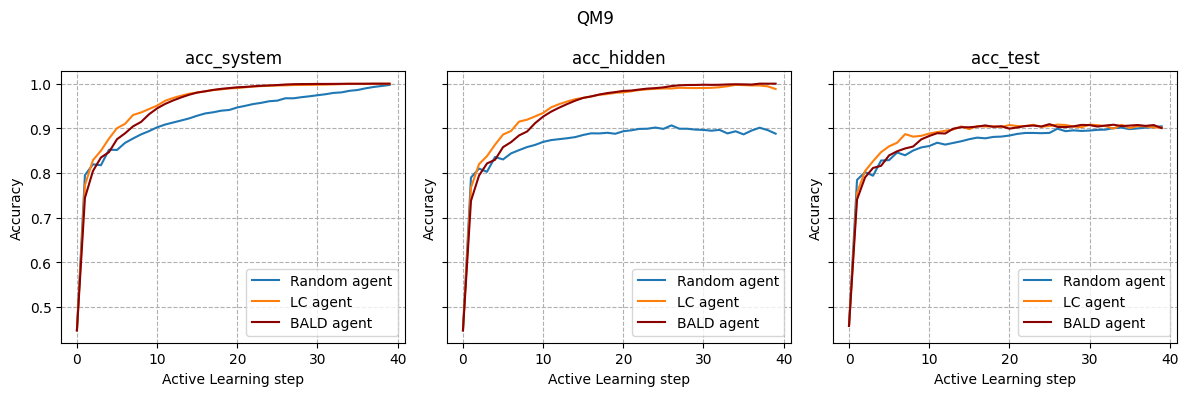

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
plt.suptitle("QM9")

for i, metric in enumerate(["acc_system", "acc_hidden", "acc_test"]):
    axes[i].set_title(metric)
    axes[i].plot(np.arange(len(metrics_random[metric])), 
            metrics_random[metric],
            label="Random agent"
            )
    axes[i].plot(np.arange(len(metrics_active[metric])), 
            metrics_active[metric],
            label="LC agent"
            )
    axes[i].plot(np.arange(len(metrics_bald[metric])), 
            metrics_bald[metric],
            label="BALD agent",
            color="darkred"
            )
    axes[i].set_xlabel("Active Learning step")
    axes[i].set_ylabel("Accuracy")
    axes[i].grid(True, linestyle="--")
    axes[i].legend(loc="lower right")
plt.tight_layout()
plt.show()